# Exploratory Data Analysis of Student Data on Zumbi-Venom Game


In [1]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import seaborn as sns
from datetime import datetime

## Restricting data from db dump to experiment on day 11-07-2019

In [ ]:
path = "executions-bkp-30-08-19.json"
raw_data = pd.read_json(path, lines=True)
# data.head()
# Filtrar time stamp para 11/07/2019 das 10 as 12 GMT-03:00
data_venom = raw_data.loc[lambda df: df.timestamp > '2019-08-10 12:00:00']
data_venom = raw_data.loc[lambda df: df.timestamp < '2019-08-10 18:00:00']
data_venom.to_json("executions-experiments-zv-10-08.json", orient='split')
data_venom.head()

## Reconstructing user track

In [6]:
path = "executions-experiments-zv-10-08.json" 
data = pd.read_json(path, orient="split")
data.head()

,_id,payload,timestamp,topic
0,{'$oid': '5d274101febb1ac74b9ce573'},{'responseStamp': 1},2019-07-11 14:00:33.384,data/case/148e8e25-5f91-4189-83cd-646c1ebed299...
1,{'$oid': '5d274101febb1ac74b9ce574'},{'responseStamp': 2},2019-07-11 14:00:33.470,data/theme/zombie.case/get
2,{'$oid': '5d274101febb1ac74b9ce575'},"{'name': 'Zombie Venom 01', 'source': '# 1 (ca...",2019-07-11 14:00:33.475,data/case/148e8e25-5f91-4189-83cd-646c1ebed299...
3,{'$oid': '5d274101febb1ac74b9ce576'},"{'content': '<div class=""styt-pul-main"">{knot}...",2019-07-11 14:00:33.786,data/theme/zombie.case/get/response/2
4,{'$oid': '5d274101febb1ac74b9ce577'},{'responseStamp': 3},2019-07-11 14:00:33.789,data/theme/zombie.start/get


In [8]:
def reconstruct_users_track(log):
    users_tracks = dict()
    for index, row in log.iterrows():
        payload = row.payload
        if 'track' in payload and 'userid' in payload['track']:
            user = payload['track']['userid'] 
            if user in users_tracks:
                users_tracks[user].append(row)
            else:
                users_tracks.update({user: [row]})
    return users_tracks

In [9]:
users_tracks = reconstruct_users_track(data)
users_tracks.keys()

dict_keys([21, 1, 17, 19, 16, 23, 22, 20, 18, 27, 31, 26, 32, 28, 30, 29, 24, 7, 9, 10, 12, 11, 14, 25])

In [10]:
def users_points_history(users_track):
    
    users_points = dict()
    for user in users_track.keys():
        for log in users_track[user]:
            if '/var/points/set' in log['topic']:
                points=log['payload']['content']
                if user in users_points:
                    users_points[user].append(points)
                else:
                    users_points.update({user: [points]})
    return users_points

In [11]:
users_points = users_points_history(users_tracks)
users_points[21]

[100,
 90,
 80,
 90,
 80,
 90,
 80,
 90,
 100,
 110,
 100,
 110,
 100,
 90,
 100,
 110,
 120,
 100,
 90,
 100]

In [12]:
data_frames = []
for key in users_points.keys():
    df = pd.DataFrame(users_points[key],columns=[key])
    data_frames.append(df)

df_users_points = pd.concat(data_frames, axis=1)
df_users_points

,21,1,17,19,16,23,22,20,18,27,...,30,29,24,7,9,10,12,11,14,25
0,100.0,100.0,90.0,90.0,110.0,90.0,90.0,90.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,90.0,100.0,80.0,80.0,100.0,80.0,100.0,80.0,90.0,110.0,...,110.0,110.0,90.0,90.0,90.0,110.0,90.0,90.0,90.0,90.0
2,80.0,100.0,90.0,90.0,90.0,70.0,110.0,70.0,80.0,100.0,...,100.0,120.0,100.0,80.0,80.0,100.0,80.0,100.0,100.0,NaN
3,90.0,100.0,100.0,80.0,100.0,60.0,100.0,80.0,70.0,110.0,...,110.0,110.0,90.0,70.0,70.0,90.0,70.0,90.0,90.0,NaN
4,80.0,100.0,90.0,70.0,110.0,70.0,110.0,90.0,60.0,100.0,...,100.0,100.0,100.0,60.0,60.0,80.0,60.0,80.0,80.0,NaN
5,90.0,100.0,100.0,80.0,100.0,80.0,120.0,80.0,50.0,90.0,...,110.0,110.0,90.0,70.0,50.0,70.0,50.0,90.0,70.0,NaN
6,80.0,100.0,90.0,90.0,90.0,90.0,110.0,90.0,60.0,80.0,...,100.0,100.0,80.0,80.0,60.0,80.0,60.0,80.0,60.0,NaN
7,90.0,100.0,80.0,100.0,100.0,80.0,120.0,80.0,70.0,70.0,...,90.0,110.0,90.0,70.0,50.0,90.0,50.0,70.0,70.0,NaN
8,100.0,100.0,70.0,110.0,110.0,70.0,110.0,90.0,80.0,60.0,...,100.0,120.0,100.0,60.0,60.0,80.0,40.0,60.0,80.0,NaN
9,110.0,100.0,60.0,120.0,100.0,80.0,120.0,100.0,90.0,NaN,...,90.0,110.0,110.0,50.0,70.0,70.0,50.0,50.0,70.0,NaN


In [129]:
df_users_points.describe()

,21,1,17,19,16,23,22,20,18,27,31,26,32,28,30,29,24
count,17.000000,2.0,25.000000,16.000000,16.000000,16.000000,15.000000,11.000000,17.000000,9.000000,16.000000,33.000000,13.000000,7.000000,13.000000,10.000000,10.000000
mean,96.470588,100.0,87.200000,115.000000,97.500000,87.500000,122.666667,87.272727,83.529412,91.111111,76.250000,81.818182,80.000000,92.857143,96.923077,109.000000,95.000000
std,11.694644,0.0,17.204651,35.777088,8.563488,16.931233,23.135213,11.037127,16.179144,17.638342,13.102163,24.931725,16.832508,7.559289,10.315535,7.378648,8.498366
min,80.000000,100.0,60.000000,70.000000,80.000000,60.000000,90.000000,70.000000,50.000000,60.000000,60.000000,30.000000,50.000000,80.000000,80.000000,100.000000,80.000000
25%,90.000000,100.0,70.000000,87.500000,90.000000,77.500000,110.000000,80.000000,70.000000,80.000000,70.000000,60.000000,70.000000,90.000000,90.000000,102.500000,90.000000
50%,100.000000,100.0,90.000000,105.000000,100.000000,85.000000,120.000000,90.000000,90.000000,100.000000,70.000000,90.000000,80.000000,90.000000,100.000000,110.000000,95.000000
75%,100.000000,100.0,100.000000,142.500000,100.000000,100.000000,135.000000,90.000000,100.000000,100.000000,82.500000,100.000000,90.000000,100.000000,100.000000,110.000000,100.000000
max,120.000000,100.0,120.000000,180.000000,110.000000,120.000000,170.000000,110.000000,100.000000,110.000000,100.000000,120.000000,100.000000,100.000000,110.000000,120.000000,110.000000


## Plotting students points

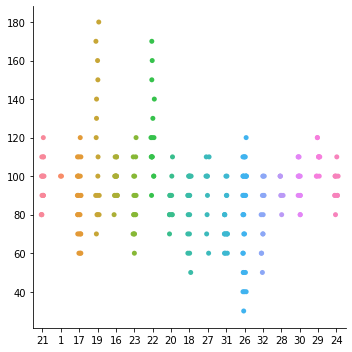

In [130]:
sns.catplot(data=df_users_points);